In [1]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cap = cv2.VideoCapture('sample.mov')
frames = []

while True:
    ret, frame = cap.read()
    if not ret:  # no more frames
        break

    # frame is a NumPy array of shape (H, W, 3) in BGR format
    frames.append(frame)

cap.release()

frames_array = np.stack(frames, axis=0)

Total: 1884
Current: 0
Total: 1884
Current: 1
Total: 1884
Current: 2
Total: 1884
Current: 3
Total: 1884
Current: 4
Total: 1884
Current: 5
Total: 1884
Current: 6
Total: 1884
Current: 7
Total: 1884
Current: 8
Total: 1884
Current: 9
Total: 1884
Current: 10
Total: 1884
Current: 11
Total: 1884
Current: 12
Total: 1884
Current: 13
Total: 1884
Current: 14
Total: 1884
Current: 15
Total: 1884
Current: 16
Total: 1884
Current: 17
Total: 1884
Current: 18
Total: 1884
Current: 19
Total: 1884
Current: 20
Total: 1884
Current: 21
Total: 1884
Current: 22
Total: 1884
Current: 23
Total: 1884
Current: 24
Total: 1884
Current: 25
Total: 1884
Current: 26
Total: 1884
Current: 27
Total: 1884
Current: 28
Total: 1884
Current: 29
Total: 1884
Current: 30
Total: 1884
Current: 31
Total: 1884
Current: 32
Total: 1884
Current: 33
Total: 1884
Current: 34
Total: 1884
Current: 35
Total: 1884
Current: 36
Total: 1884
Current: 37
Total: 1884
Current: 38
Total: 1884
Current: 39
Total: 1884
Current: 40
Total: 1884
Current: 41
To

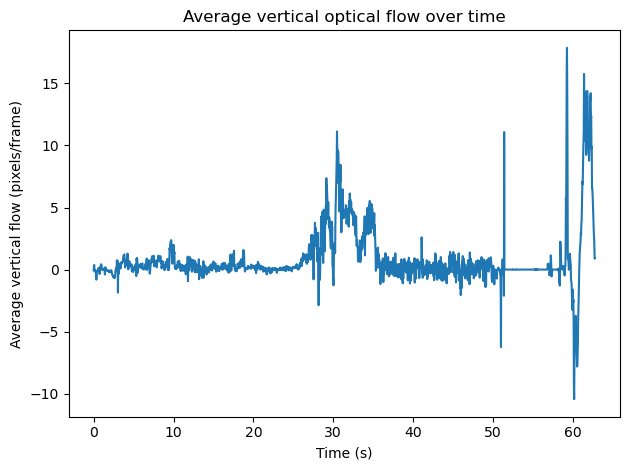

In [3]:

T = frames_array.shape[0]

# Convert to grayscale
grays = [cv2.cvtColor(f, cv2.COLOR_BGR2GRAY) for f in frames_array]

avg_vy_list = []

for t in range(T - 1):
    prev_gray = grays[t]
    gray      = grays[t + 1]

    flow = cv2.calcOpticalFlowFarneback(
        prev_gray, gray,
        None,
        0.5,
        3,
        15,
        3,
        5,
        1.2,
        0
    )

    vy = flow[..., 1]                  # vertical component
    avg_vy = vy.mean()                 # average over all pixels
    avg_vy_list.append(avg_vy)

# Now avg vertical flow as 1D array over time
avg_vy_array = np.array(avg_vy_list)   # shape: (T-1,)

# Optional: plot vs time if you know fps
fps = 30.0  # change to your video fps
time = np.arange(len(avg_vy_array)) / fps

plt.figure()
plt.plot(time, avg_vy_array)
plt.xlabel("Time (s)")
plt.ylabel("Average vertical flow (pixels/frame)")
plt.title("Average vertical optical flow over time")
plt.tight_layout()
plt.show()